In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('./wiki_movie_plots_deduped.csv', sep=",")
data.head()

Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director Cast    Genre  \
0                             Unknown  NaN  unknown   
1                             Unknown  NaN  unknown   
2                             Unknown  NaN  unknown   
3                             Unknown  NaN  unknown   
4  George S. Fleming, Edwin S. Porter  NaN  unknown   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://en.wikipedia.org/wiki/Terrible_Teddy,_...   
4  https://en.wikipedia.org/wiki/Jack_and_the_Bea...   

                                                Plot  
0  A bartender is working at a saloon, serving dr...  
1  The moon, painted with a smiling face hangs ov...  
2  The film, just over a minute long, is composed...  
3  Lasting just 61 seconds and consisting of two ...  
4  The earliest known adaptation of the classic f...

In [3]:
data.shape

(34886, 8)

In [4]:
data.dtypes

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object

### Удаление и замена пустых значений

In [5]:
data.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [6]:
data_del0_1 = data.dropna(axis = 1 , how = "any")
data.shape,data_del0_1.shape

((34886, 8), (34886, 7))

In [7]:
data_del0_2 = data.dropna(axis = 0 , how = "any")
data.shape,data_del0_2.shape

((34886, 8), (33464, 8))

In [8]:
data_new_3 = data.fillna("Unknown")
data.shape,data_new_3.shape
data_new_3.head()

Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director     Cast    Genre  \
0                             Unknown  Unknown  unknown   
1                             Unknown  Unknown  unknown   
2                             Unknown  Unknown  unknown   
3                             Unknown  Unknown  unknown   
4  George S. Fleming, Edwin S. Porter  Unknown  unknown   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://en.wikipedia.org/wiki/Terrible_Teddy,_...   
4  https://en.wikipedia.org/wiki/Jack_and_the_Bea...   

                                                Plot  
0  A bartender is working at a saloon, serving dr...  
1  The moon, painted with a smiling face hangs ov...  
2  The film, just over a minute long, is composed...  
3  Lasting just 61 seconds and consisting of two ...  
4  The earliest known adaptation of the classic f...

In [9]:
from sklearn.impute import SimpleImputer
num_cols = []   
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Cast. Тип данных object. Количество пустых значений 1422, 4.08%.


In [10]:
cat_temp_data = data[['Cast']]
cat_temp_data['Cast'].unique()

array([nan, 'May Clark', 'William Craven, Florence Lawrence', ...,
       'Ata Demirer, Tuvana Türkay, Ülkü Duru',
       'YouTubers Shanna Malcolm, Shira Lazar, Sara Fletcher and Ashley Clements',
       'Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler'],
      dtype=object)

In [11]:
cat_temp_data.head()

Cast
0  NaN
1  NaN
2  NaN
3  NaN
4  NaN

In [12]:
cat_temp_data[cat_temp_data['Cast'].isnull()].shape

(1422, 1)

In [13]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='NA')
data_imp = imp.fit_transform(cat_temp_data)
data_imp

array([['NA'],
       ['NA'],
       ['NA'],
       ...,
       ['Ata Demirer, Tuvana Türkay, Ülkü Duru'],
       ['YouTubers Shanna Malcolm, Shira Lazar, Sara Fletcher and Ashley Clements'],
       ['Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler']],
      dtype=object)

In [14]:
data_imp[data_imp=='NA'].size

1422

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_enc = pd.DataFrame({'c1':data_imp.T[0]})
cat_enc

c1
0                                                     NA
1                                                     NA
2                                                     NA
3                                                     NA
4                                                     NA
...                                                  ...
34881  Director: Russell Crowe\r\nCast: Russell Crowe...
34882                          Ahmet Kural, Murat Cemcir
34883              Ata Demirer, Tuvana Türkay, Ülkü Duru
34884  YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...
34885  Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...

[34886 rows x 1 columns]

In [16]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['NA', 'May Clark', 'William Craven, Florence Lawrence', ...,
       'Ata Demirer, Tuvana Türkay, Ülkü Duru',
       'YouTubers Shanna Malcolm, Shira Lazar, Sara Fletcher and Ashley Clements',
       'Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler'],
      dtype=object)

In [17]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 32180, 32181, 32182])

In [18]:
le.inverse_transform([0, 1, 2, 3])

array(['"Manamantha"', "'Fatty' Arbuckle / Buster Keaton",
       "'Fatty' Arbuckle, Al St. John", "'Fatty' Arbuckle, Buster Keaton"],
      dtype=object)

In [19]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(34886, 1)

In [20]:
cat_enc_ohe

<34886x32183 sparse matrix of type '<class 'numpy.float64'>'
	with 34886 stored elements in Compressed Sparse Row format>

In [21]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

Cast_"Manamantha"  Cast_'Fatty' Arbuckle / Buster Keaton  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   Cast_'Fatty' Arbuckle, Al St. John  Cast_'Fatty' Arbuckle, Buster Keaton  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   Cast_'Fatty' Arbuckle/Buster Keaton  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Cast_(Korean dubbed) Kim Il, Choi Jeong-ho  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Cast_(Korean dubbed) Lee Taemin, Sunny  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Cast_(voices of) Judy Garland, Robert Goulet, Red Buttons  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   Cast_(voices of) Kelsey Grammer, Ian Holm, Paul Scofield, Patrick Stewart, Julia Ormond, Peter Ustinov  \
0                                                  0                                                        
1                                                  0                                                        
2                                                  0                                                        
3                                                  0                                                        
4                                                  0                                                        

   Cast_(voices) Jonathan Taylor Thomas, Matthew Broderick, Jeremy Irons, James Earl Jones, Whoopi Goldberg, Moira Kelly, Nathan Lane  \
0                                                  0                                                                                    
1                                                  0                                                                                    
2                                                  0                                                                                    
3                                                  0                                                                                    
4                                                  0                                                                                    

   ...  Cast_Öner Erkan, Kadir Çermik & Damla Sönmez  \
0  ...                                             0   
1  ...                                             0   
2  ...                                             0   
3  ...                                             0   
4  ...                                             0   

   Cast_İsmail Hacıoğlu, Erkan Can & Uğur Polat  \
0                                             0   
1                           

## Масштабирование

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

data = pd.read_csv("./SampleSuperstore.csv",sep = ",")
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

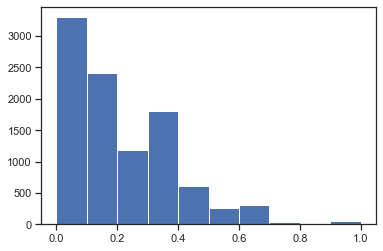

In [24]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Quantity']])
plt.hist(sc1_data)
plt.show()

In [25]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Quantity']])

In [26]:
plt.hist(sc2_data)
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer

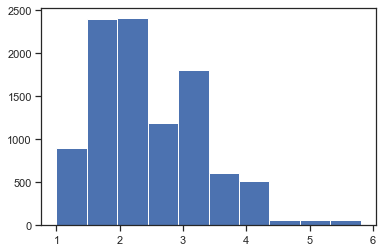

In [28]:
input = data[['Quantity']]
sc3_data = data['Quantity']**(1/1.5)
plt.hist(sc3_data)
plt.show()

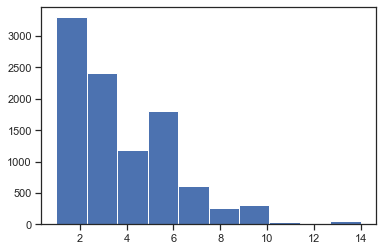

In [29]:
plt.hist(data[['Quantity']])
plt.show()

###  Обработка выбросов

Profit
count  9993.000000
mean     28.652464
std     234.271411
min   -6599.978000
25%       1.728000
50%       8.662000
75%      29.364000
max    8399.976000

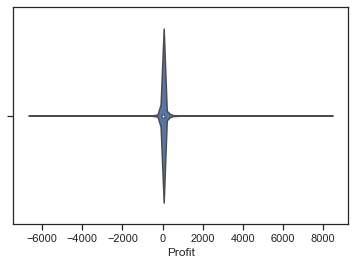

In [30]:
display(data[["Profit"]].describe())

plt.hist(data[["Profit"]], 50)
plt.show()

sns.violinplot(x=data["Profit"]);

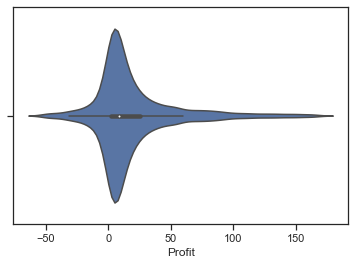

In [31]:
from enum import Enum
class OutlierBoundaryType(Enum):
  SIGMA = 1
  QUANTILE = 2
  IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
  if outlier_boundary_type == OutlierBoundaryType.SIGMA:
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
  elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
  elif outlier_boundary_type == OutlierBoundaryType.IRQ:
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
  else:
    raise NameError('Unknown Outlier Boundary Type')

  return lower_boundary, upper_boundary

lower_boundary, upper_boundary = get_outlier_boundaries(data, "Profit", OutlierBoundaryType.QUANTILE)
outliers_temp = np.where(
  data["Profit"] > upper_boundary,
  True,
  np.where(
    data["Profit"] < lower_boundary,
    True,
    False
  )
)
data_trimmed = data.loc[~(outliers_temp),]
sns.violinplot(x=data_trimmed["Profit"]);

Sales
count   9993.000000
mean     229.856670
std      623.276273
min        0.444000
25%       17.280000
50%       54.480000
75%      209.940000
max    22638.480000

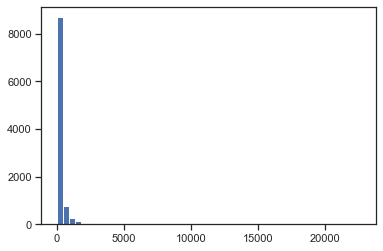

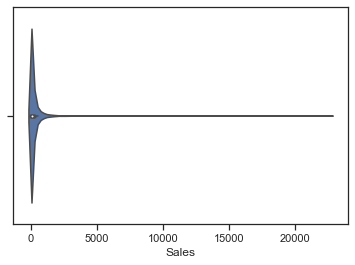

In [32]:
display(data[["Sales"]].describe())

plt.hist(data[["Sales"]], 50)
plt.show()

sns.violinplot(x=data["Sales"]);

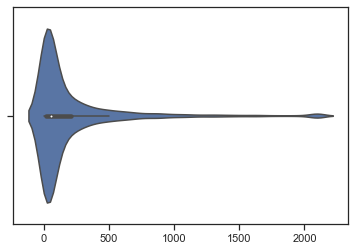

In [33]:
lower_boundary, upper_boundary = get_outlier_boundaries(data, "Sales", OutlierBoundaryType.SIGMA)
data_replaced = np.where(
  data['Sales'] > upper_boundary,
  upper_boundary,
  np.where(
    data['Sales'] < lower_boundary,
    lower_boundary,
    data['Sales'],
  )
)

sns.violinplot(x=data_replaced);

### Обработка нестандартного признака

In [34]:
data = pd.read_csv('laptops_train.csv', sep=",")
data.Weight.unique()
data["Weight_num"] = data.apply(lambda x: float(x.Weight.strip("kg")),axis=1)

In [35]:
data.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  Weight_num  
0                      NaN  1.37kg  11912523.48        1.37  
1                      NaN  1.34kg   7993374.48        1.34  
2                      NaN  1.86kg   5112900.00        1.86  
3                      NaN  1.83kg  22563005.40        1.83  
4                      NaN  1.37kg  16037611.20        1.37

# Отбор признаков

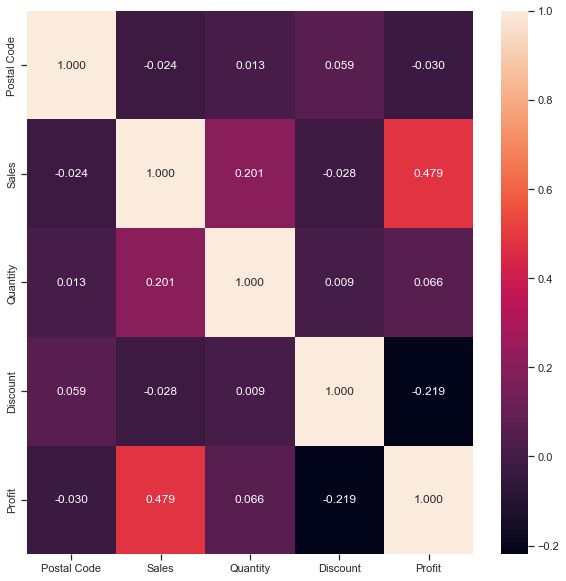

In [36]:
#Метод из группы методов фильтрации
# Метод, основанный на корреляции
data = pd.read_csv("./SampleSuperstore.csv",sep = ",")
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.3f');


In [37]:
# Формирование DataFrame с сильными корреляциями
# Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
# Важно, чтобы признаки не коррелировали между собой.

def make_corr_df(df):
  cr = data.corr()
  cr = cr.abs().unstack()
  cr = cr.sort_values(ascending=False)
  cr = cr[cr >= 0.4]
  cr = cr[cr < 1]
  cr = pd.DataFrame(cr).reset_index()
  cr.columns = ['f1', 'f2', 'corr']
  return cr

In [38]:
make_corr_df(data)

f1      f2      corr
0   Sales  Profit  0.479065
1  Profit   Sales  0.479065

In [39]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [40]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [41]:
#Метод из группы методов обертывания
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

data = pd.read_csv("./SampleSuperstore.csv",sep = ",")

data = data.drop(columns=["Ship Mode","Segment","Country","State","Region","Category","Sub-Category",])

x = data.drop(columns=["City"])

y = data['City'].squeeze()

x.dtypes


Postal Code      int64
Sales          float64
Quantity         int64
Discount       float64
Profit         float64
dtype: object

In [42]:
y.dtypes

dtype('O')

In [43]:

knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(x, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least pop

Best accuracy score: 0.98
Best subset (indices): (0, 3)
Best subset (corresponding names): ('Postal Code', 'Discount')


In [48]:
#Метод из группы методов вложений
data = pd.read_csv("./SampleSuperstore.csv",sep = ",")
data = data.drop(columns=["Ship Mode","Segment","Country","State","Region","Category","Sub-Category","City"])

x = data.drop(columns=["Profit"])

y = data['Profit'].squeeze()

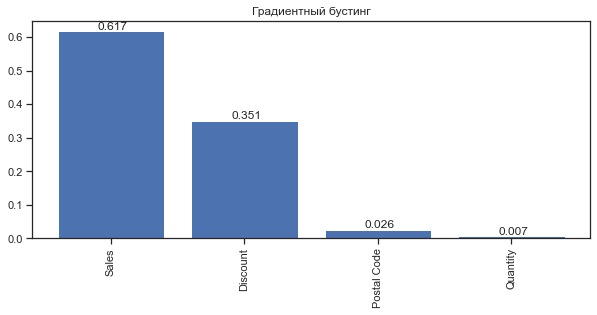

In [49]:
from operator import itemgetter
from sklearn.ensemble import GradientBoostingRegressor

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
  # Сортировка значений важности признаков по убыванию
  list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
  sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
  # Названия признаков
  labels = [x for x,_ in sorted_list]
  # Важности признаков
  data = [x for _,x in sorted_list]
  # Вывод графика
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_title(title)
  ind = np.arange(len(labels))
  plt.bar(ind, data)
  plt.xticks(ind, labels, rotation='vertical')
  # Вывод значений
  for a,b in zip(ind, data):
    plt.text(a-0.1, b+0.005, str(round(b,3)))
  plt.show()
  return labels, data

# Градиентный бустинг
gbr1 = GradientBoostingRegressor()
gbr1.fit(x, y);

draw_feature_importances(gbr1, x, 'Градиентный бустинг', figsize=(10,4));